# PLS

In [161]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd

plt.rcParams['font.size'] = '18'
plt.rcParams['figure.figsize'] = (12, 8)

In [247]:
# Cargamos los datos
df = pd.read_csv('U300_web_7_9_2017.csv')

# Acá lo que hacemos es separar algunos para testeo y otros para entrenamiento

Xi = df.iloc[:-1000, 2:-1]
Xitest = df.iloc[-1000:, 2:-1]

In [254]:
df.shape

(20720, 62)

In [253]:
Xi.shape

(19720, 59)

In [250]:
Xitest.shape

(1000, 59)

In [284]:
var = 26

Xg = Xi.drop(Xi.columns[var:var+1], axis=1)
Xtest = Xitest.drop(Xitest.columns[var:var+1], axis=1)

# Los últimos 1000 datos de la columna 26, X-TI0AB9
Yg = df.iloc[:-1000, var:var+1]

# Los datos menos los últimos 1000 de la columna 26, X-TI0AB9
Ytest = df.iloc[-1000:, var:var+1]

In [285]:
Xg.shape

(19720, 58)

In [286]:
Ytest.head(5)

,X-TI0AB9
19720,77.01924
19721,77.24349
19722,76.59539
19723,75.52475
19724,76.45334


In [287]:
Xtest.head(5)

,X-TI0B054,X-PI0B008,X-PIB50B3,X-FX0B002,X-FI0220B,X-FI0A02,X-FI0A03,X-FI0A04,X-FI0A08,X-FI0A09,...,X-FI0A23B,X-FI0A23BB,X-FIC0AB7_SP,X-FIC0AB6_SP,X-FIC0AB5_SP,X-FIC0A09_SP,X-PIC0A08B_SP,X-FIC0A03_SP,X-FIC0A04_SP,X-LIC0A0BA_OU
19720,157.61446,20.30028,2.80053,86134.86407,163711.0417,782.60263,69.50011,10708.11248,62.45992,23.31030,...,1072.60983,-6.310000e-07,9.35251,143.01999,42263.02066,0.35001,0.35,69.49779,10708.0,0.0
19721,157.60384,20.28504,2.80042,86097.99228,163174.4167,781.93930,69.27800,10707.96672,62.21774,23.48689,...,1074.72173,-4.570000e-07,9.25676,143.01999,42060.07598,0.35001,0.35,69.28038,10708.0,0.0
19722,157.41083,20.25163,2.79792,85312.40408,162490.4722,772.23263,68.80425,10707.83920,61.53355,23.62169,...,1073.09652,1.320000e-07,9.59799,143.01999,42094.27695,0.35001,0.35,68.78629,10708.0,0.0
19723,157.40618,20.23705,2.80216,84893.87695,161786.0278,756.14105,68.24898,10708.16627,60.89138,23.35878,...,1075.59252,-1.130000e-06,8.74053,143.01999,41623.14446,0.35001,0.35,68.25344,10708.0,0.0
19724,157.49696,20.25168,2.79907,85279.18816,162226.7639,760.41827,68.58469,10707.82216,61.33391,23.30347,...,1078.18055,6.590000e-07,9.55330,143.01999,42077.99422,0.35001,0.35,68.58789,10708.0,0.0


In [288]:
df.head(5)

,Fecha Inicio,Fecha Fin,X-TI0B054,X-PI0B008,X-PIB50B3,X-FX0B002,X-FI0220B,X-FI0A02,X-FI0A03,X-FI0A04,...,X-FI0A23BB,X-FIC0AB7_SP,X-FIC0AB6_SP,X-FIC0AB5_SP,X-FIC0A09_SP,X-PIC0A08B_SP,X-FIC0A03_SP,X-FIC0A04_SP,X-LIC0A0BA_OU,X-FI0A23
0,17/9/3913 02:00,17/9/3913 03:00,156.17953,19.43168,2.85367,61983.11883,129053.9722,238.48077,51.58205,9749.85345,...,3.970000e-07,7.12676,112.03998,36497.48698,20.0,0.35,51.58307,9750.0,0.0,34367.92465
1,17/9/3913 03:00,17/9/3913 04:00,156.16643,19.42245,2.85449,61923.43149,127102.2500,237.21077,51.50967,9750.08328,...,-5.400000e-07,6.87150,112.03998,36594.82031,20.0,0.35,51.50776,9750.0,0.0,34490.05313
2,17/9/3913 04:00,17/9/3913 05:00,156.14086,19.41854,2.85285,61505.02021,128304.7778,233.79820,51.23336,9749.94112,...,5.470000e-07,8.90921,112.03998,36594.82031,20.0,0.35,51.23263,9750.0,0.0,32678.06146
3,17/9/3913 05:00,17/9/3913 06:00,156.20871,19.43191,2.85351,61819.86941,127758.9722,236.86505,51.35461,9750.00062,...,1.540000e-07,8.08907,112.03998,36594.82031,20.0,0.35,51.35710,9750.0,0.0,33825.42889
4,17/9/3913 06:00,17/9/3913 07:00,156.16745,19.42832,2.85562,61965.22336,127567.0556,241.69764,51.65314,9749.84344,...,-1.210000e-07,5.90919,112.03998,36594.82031,20.0,0.35,51.65353,9750.0,0.0,35801.59983


In [289]:
df.shape

(20720, 62)

In [290]:
# Elegimos valores de parámetros posibles para optimizar
p_grid = {"n_components": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

# Instanciamos un modelo de regresión PLS
pls = PLSRegression()

# Acá me armo los splits que voy a usar en el proceso de validación cruzada
# Se define un KFold para dárselo como parámetro al GridSearchCV, que es quien se encarga de ensayar todas
# las posibilidades y devolver la mejor de todas en cuanto a hiperparámetros del modelo se trata
inner_cv = KFold(n_splits=4, shuffle=False)

# Creamos nuestro objeto GridSearch
clf = GridSearchCV(estimator = pls, 
                   param_grid = p_grid,
                   cv = inner_cv,
                   scoring = 'r2',
                   verbose = True)

# clf = GridSearchCV(estimator=pls, param_grid=p_grid, cv=inner_cv, scoring='r2', verbose=True)

Acá vemos que si lo printeamos nos da los métodos que va a usar, los parámetros, ...

In [291]:
print(clf)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=PLSRegression(),
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13]},
             scoring='r2', verbose=True)


Ahora que tenemos todo planteado, vamos a pedirle al GridSearch que me fittee todas las posibilidades y que devuelva la mejorcita

In [292]:
clf.fit(Xg, Yg)
error_medio_cvs = -clf.best_score_

Fitting 4 folds for each of 13 candidates, totalling 52 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.8s finished


Podemos ver a continuación el mejor Score hallado y el número de parámetros que obtiene tal score

In [293]:
print(f'Número de parámetros óptimo: {clf.best_params_["n_components"]}\nScore: {clf.best_score_:.4f}')

Número de parámetros óptimo: 6
Score: 0.9791


Y podemos ver cómo fueron los resultados del Grid también. Vemos que hizo los 4 splits y que al final promedió los Scores.

In [294]:
clf.cv_results_

{'mean_fit_time': array([0.02817452, 0.0349068 , 0.03515613, 0.04338431, 0.05260926,
        0.06233358, 0.06333089, 0.07903892, 0.08901262, 0.09275275,
        0.09250313, 0.09948456, 0.12366915]),
 'std_fit_time': array([0.00734127, 0.00602561, 0.00043229, 0.00205629, 0.00285365,
        0.00294981, 0.00389448, 0.00529499, 0.00355283, 0.00411204,
        0.00570213, 0.00163444, 0.00979655]),
 'mean_score_time': array([0.00523591, 0.00423878, 0.00448793, 0.00398928, 0.00423884,
        0.00473714, 0.00448781, 0.00423843, 0.00473702, 0.00448751,
        0.00423837, 0.00398904, 0.00448817]),
 'std_score_time': array([1.08682888e-03, 4.31845729e-04, 4.98235233e-04, 1.97686242e-07,
        4.31948968e-04, 4.31811492e-04, 4.98473965e-04, 4.32189901e-04,
        4.32018626e-04, 4.98533391e-04, 4.31536015e-04, 3.52625834e-07,
        8.63656986e-04]),
 'param_n_components': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
              mask=[False, False, False, False, False, F

De manera gráfica, podemos ver los componentes con sus Scores

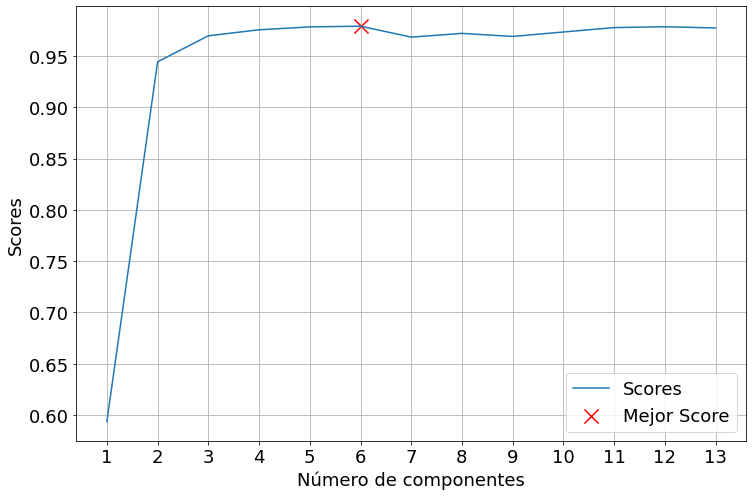

In [295]:
fig, ax = plt.subplots()
ax.plot(p_grid['n_components'],clf.cv_results_['mean_test_score'],
        zorder = 3,
        label = 'Scores')
ax.set_xlabel('Número de componentes')
ax.set_ylabel('Scores')
ax.set_xticks(p_grid['n_components'])
ax.grid(True)

ax.scatter(clf.best_params_["n_components"], clf.best_score_,
           marker = 'x',
           c = 'red',
           s = 200,
           label = 'Mejor Score')
ax.legend(loc = 'lower right')

In [296]:
# entreno con el mejor modelo
posic = clf.cv_results_['rank_test_score'][0]
posta = p_grid['n_components'][posic - 1]
print('Número de componentes: ', posta)

Número de componentes:  13


In [297]:
pls = PLSRegression(n_components=posta)
pls.fit(Xg, Yg)

# Como hubiera performado en la planta
Yp = pls.predict(Xtest)

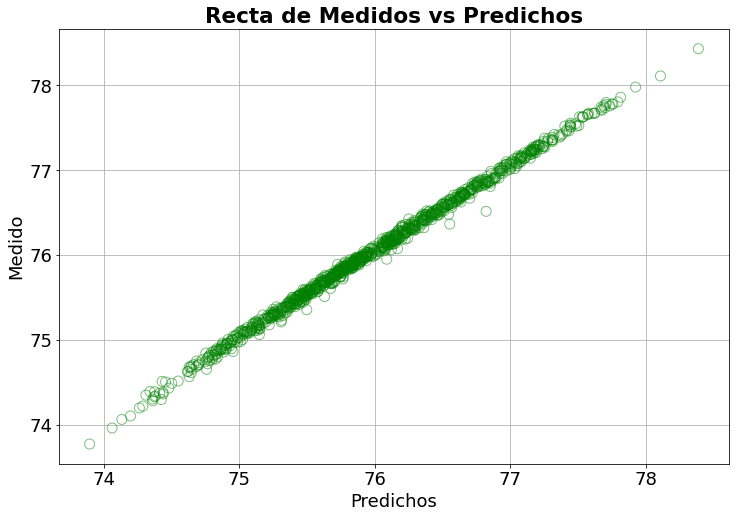

In [298]:
fig, ax = plt.subplots()

ax.scatter(Yp, Ytest,
           marker = 'o',
           facecolors = 'none',
           edgecolors = 'green',
           s = 100,
           alpha = 0.5,
           zorder = 3)
ax.set_xlabel('Predichos')
ax.set_ylabel('Medido')
ax.grid(True)
ax.set_title('Recta de Medidos vs Predichos',
             fontweight = 'bold')

error_medio_medido = np.sqrt(np.sum(np.square(Ytest.to_numpy() - Yp)) / np.shape(Yp)[0])

Text(0.5, 1.0, 'Zoom')

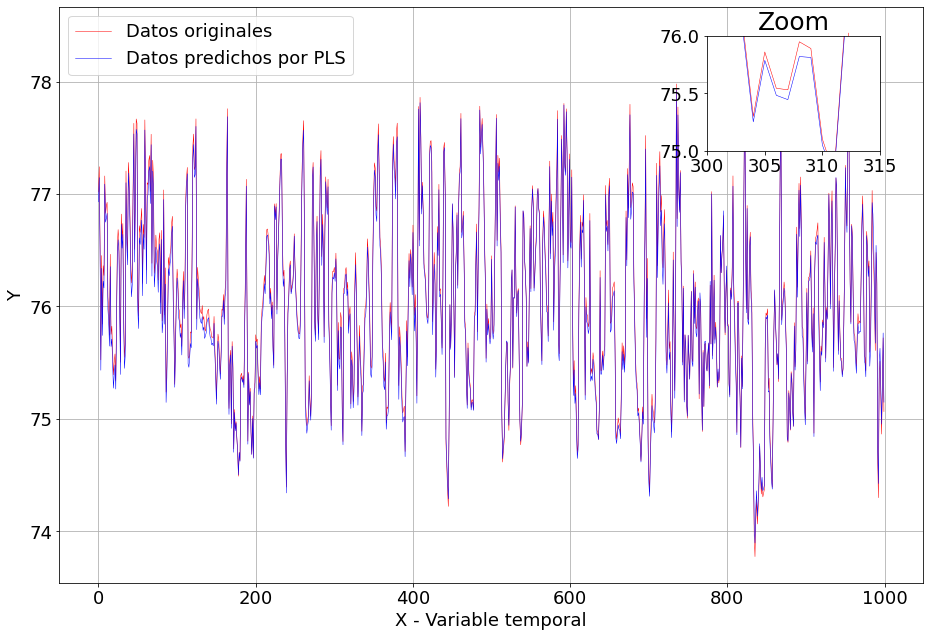

In [299]:
# %matplotlib inline
fig = plt.figure()
ax1 = fig.add_axes([0.0, 0.0, 1.0, 1.0])
ax2 = fig.add_axes([0.75, 0.75, 0.20, 0.20])

ax1.plot(Ytest.to_numpy(), 
         c = 'red', 
         linewidth = 0.5, 
         label ='Datos originales')
ax1.plot(Yp, 
         c = 'blue', 
         linewidth = 0.5,
         label = 'Datos predichos por PLS')
ax1.grid(True)
ax1.legend(loc='upper left')
ax1.set_xlabel('X - Variable temporal')
ax1.set_ylabel('Y')

ax2.plot(Ytest.to_numpy(), 
         c = 'red', 
         linewidth = 0.5)
ax2.plot(Yp, 
         c = 'blue', 
         linewidth = 0.5)
ax2.set_xlim([300, 315])
ax2.set_ylim([75, 76])
ax2.set_title('Zoom', 
              fontsize=25)

In [300]:
print("Error CV: {:6f} - Error nested: {:6f} Error medido: {:6f}".format(error_medio_cvs, error_medio_nested, error_medio_medido))

Error CV: -0.979124 - Error nested: 0.116082 Error medido: 0.067044
